In [285]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems

E, x, y = 0..20, 0..1, 0..1 
box = E × x × y 

using CairoMakie

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [9]:
U(y, p) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
σ(x, p) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
U_y(y, p) = ( 50.0 * p[9] * exp(-50.0 * (y - p[7])) ) / (1.0 + exp( -50.0*(y - p[7]) ) )^2
g(E, x, y, p) = exp((p[5]  * U(y, p) * x * E + p[11]) / p[1])
σ_der(x, p) = exp( (-20.0) * (x - p[6]) )

function TM(u, p, t)
    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3], p) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3], p)*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2], p)
    return SVector(du1, du2, du3)
end
function jacob_TM_(u, p, t)
    E_E = ( -1.0 + ((J * U(u[3], p) * u[2] * g(u[1], u[2], u[3], p))) / (1.0 + g(u[1], u[2], u[3], p)) ) / p[2]
    E_x = (p[5] * U(u[3], p) * u[1] * g(u[1], u[2], u[3], p)) / (p[2] * (1.0 + g(u[1], u[2], u[3], p) ))
    E_y = ( p[5]  * U_y(u[3], p) * u[2] * u[1] * g(u[1], u[2], u[3], p) ) / (p[2] * (1.0 + g(u[1], u[2], u[3], p)) )
    
    x_E = -U(u[3], p)*u[2]
    x_x = -1.0 / p[3] - U(u[3], p)*u[1]
    x_y = (-U_y(u[3], p)) * u[2] * u[1]
    
    y_x = 20.0 * p[10] * σ_der(u[2], p) / (1.0 + σ_der(u[2], p))^2
    y_y = -1.0/p[4]
    
    return SMatrix{3,3}(E_E, x_E, 0.0,
                    E_x, x_x, y_x,
                    E_y, x_y, y_y)
end

jacob_TM_ (generic function with 1 method)

In [10]:
t = 500.0; tt = 250.0; tstep = 0.001
const integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [11]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.30;  const ΔU0 = 0.305;

In [65]:
I0 = -1.0;

In [66]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[7.0902, 0.7465, 0.4775]

ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.0]
 time:          0.0
 state:         [7.0902, 0.7465, 0.4775]


In [67]:
fp, eigs, _ = fixedpoints(ds, box, jacob_TM_)

(3-dimensional StateSpaceSet{Float64} with 1 points, Vector{ComplexF64}[[-9.563672696196488 + 0.0im, 0.1154047920498269 - 17.037986849353327im, 0.1154047920498269 + 17.037986849353327im]], Bool[0])

In [68]:
fp

3-dimensional StateSpaceSet{Float64} with 1 points
 9.25834  0.732799  0.410686

In [69]:
eigs[1]

3-element Vector{ComplexF64}:
 -9.563672696196488 + 0.0im
 0.1154047920498269 - 17.037986849353327im
 0.1154047920498269 + 17.037986849353327im

In [22]:
tr, trange = trajectory(ds, t, Δt = tstep; Ttr = tt)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 250.0:0.001:750.0)

In [23]:
lb_size = 25; tck_size = 15;

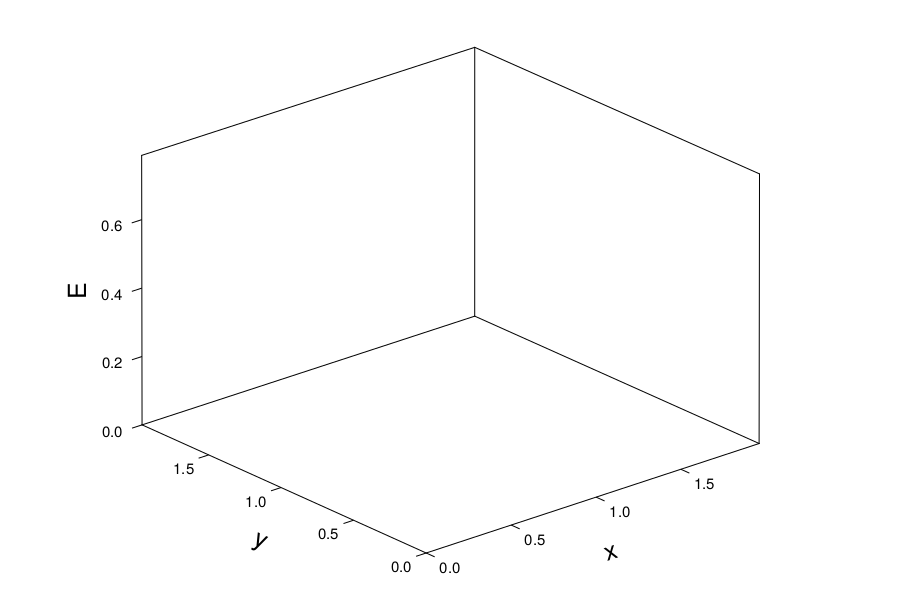

In [24]:
ts, tf = 1, 15000
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

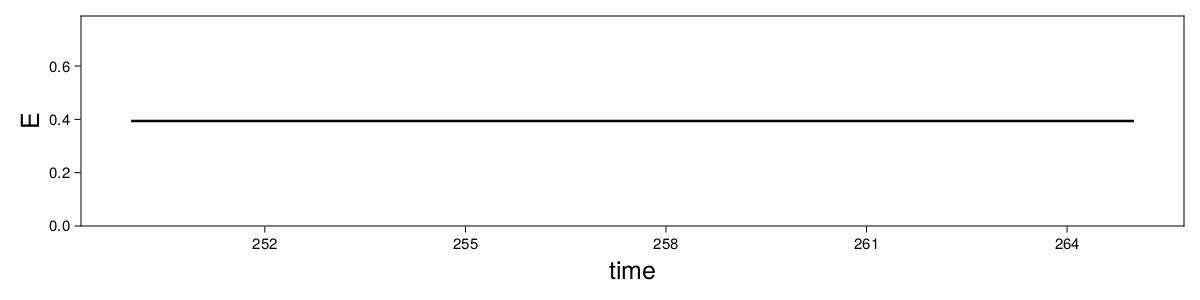

In [25]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [395]:
function equat(x, c)
    c[1] .+ c[2]*x .+ c[3]*x.^2 .+ c[4]*x.^3 .+ c[5]*x.^4
end

equat (generic function with 2 methods)

In [396]:
I0_data = load("I0.jld")["data"]
U0_data = load("U0.jld")["data"]
I0_data = I0_data[:]
U0_data = U0_data[:];

In [397]:
f4 = fit(U0_data, I0_data, 4)

Polynomial(-14.846920206370372 + 137.30797113737475*x - 531.3525765310277*x^2 + 924.3161458728235*x^3 - 614.3210937502782*x^4)

In [398]:
f4.coeffs

5-element Vector{Float64}:
  -14.846920206370372
  137.30797113737475
 -531.3525765310277
  924.3161458728235
 -614.3210937502782

In [401]:
xtest = equat(U0_data, f4.coeffs);

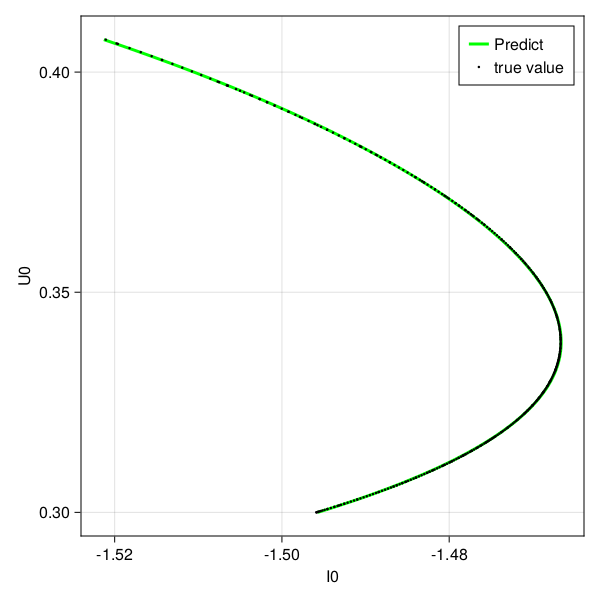

In [411]:
f = Figure(resolution = (600, 600))
axis = Axis(f[1, 1], xlabel = "I0", ylabel = "U0")
lines!(axis, xtest, U0_data, linewidth = 3.0, color = :lime, label = "Predict")
scatter!(axis, I0_data, U0_data, markersize = 3.5, color = :black, label = "true value")
axislegend()
f